# Abstract
This notebook aims to illustrate shifts in mental health challenges in Canada as a result of COVID-19 by using survey data from Canadians in May 2020. The data used are survey data from two surveys released by CAMH and Delvinia. The purpose of this notebook isn't to reiterate the conclusions provided by CAMH/Delvinia (found [here](https://www.camh.ca/en/health-info/mental-health-and-covid-19/covid-19-national-survey)) but is instead intended to identify any correlations and differences across provinces among the answers to the different survey questions to better design and target mental health services in Canada.

**Data**: data used are survey data from two surveys released by CAMH and Delvinia. For both surveys, over 1000 Canadians submitted responses.

**Scientific strategy**: the uncertainty coefficient is used to quantify associations between categorical responses to survey questions. 95% confidence intervals for difference in proportions are used to determine if there were any differences in responses across participants living in different provinces, including those with the highest number of confirmed COVID-19 cases. 95% confidence intervals for difference in proportions are used to determine if there were any differences in responses across participants living with children and participants living without children.

**Unique and novel insight**: this is the first notebook that makes use of the CAMH/Delvinia data (to the best of the author's knowledge).

**Market translation and applicability**: this notebook uses a data-driven approach to determine whether certain individuals/populations among Canada should have specific mental health services/initiatives targeted towards them.

# Survey 2 Results
Survey 1 took place from May 8-12 and survey 2 took place from May 29-Jun 1. To see differences in survey response questions between the two survey periods, please see the [survey summary dashboard](https://www.camh.ca/en/health-info/mental-health-and-covid-19/covid-19-national-survey). The results from survey 2 will be considered here since they are the most up-to-date results.

## Data Overview
To understand who completed the survey, let's load the data and see the survey questions. The questions were the same for both surveys.

In [17]:
#libraries for analysis
import numpy as np
import pandas as pd
import math
import scipy.stats as ss
from collections import Counter

#libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

url= "https://raw.githubusercontent.com/vvbauman/Mental-Health-in-Canada-Covid19/master/survey2_results.csv"
sur2= pd.read_csv(url, error_bad_lines= False, encoding= 'unicode_escape')
surv2.columns #survey questions

Index(['ID', 'Survey status', 'Preferred language',
       'hWave : WAVE TRACKER - WAVE TRACKER', 'Consent to participate',
       'Province', 'Province/region', 'Age group', 'Age group.1',
       'Gender identity', 'Gender identity.1',
       'Q4_1 : I, or someone close to me, has tested positive for COVID-19 ',
       'Q4_2 : I, or someone close to me, has had symptoms of COVID-19 but has not been tested ',
       'Q4_3 : I, or someone close to me, has been tested for COVID-19 but it was negative',
       'Q4_4 : I, or someone close to me, is elderly and/or has a health condition that increases the risk of serious illness from COVID-19 ',
       'Q4_5 : I have a job that exposes me to high risk of getting COVID-19 ',
       'Q4_6 : Someone close to me has a job that exposes them to high risk of getting COVID-19 ',
       'Q4_99 : None of the above',
       'Q5 : How worried are you about the impact of COVID-19 on your personal financial situation?',
       'Q6 : How have physical dis

We can see that there are questions related to **personal exposure/experience with the virus itself, employment, mood, alcohol and cannabis consumption, living situation, as well as education and income.** Let's visualize the distributions of gender identity, race, and location of survey participants.

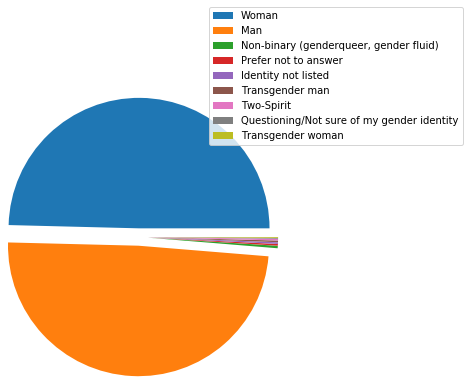

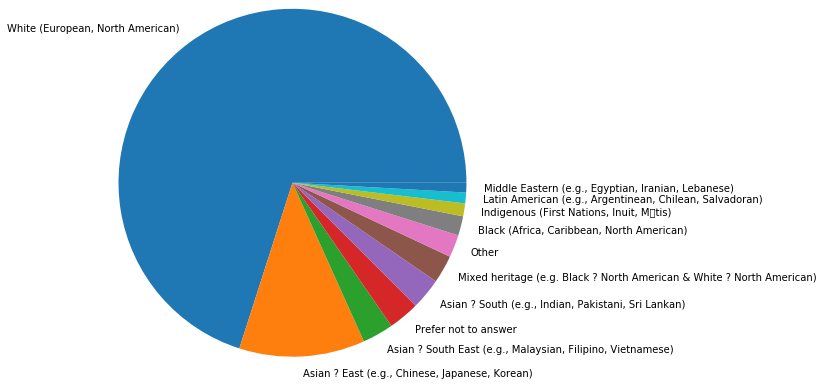

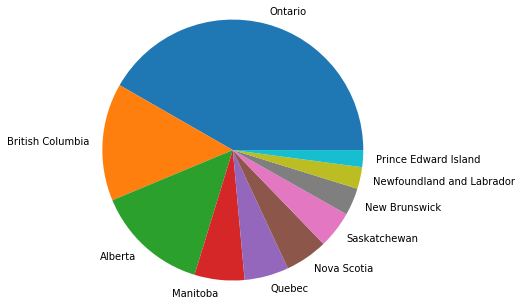

In [22]:
#distribution of gender identity
gender= sur2['Gender identity'].value_counts()
plt.pie(gender, labels= gender.index, explode= np.full((len(gender)), 0.1),labeldistance= None, radius=1.5)
plt.legend(gender.index, bbox_to_anchor=(0.8, 0.9))

#distribution of race
race= sur2['Q27 : Which of the following best describes your racial or ethnic group? '].value_counts()
plt.figure()
plt.pie(race, labels= race.index,radius=2)

#distribution of location
location= sur2['Province'].value_counts()
plt.figure()
plt.pie(location, labels= location.index, radius= 1.5)
print()

Approx. 99% of survey participants identified as being either a woman or a man, 70% stated they were white (European, North American), and 56% were living in either Ontario or British Columbia at the time of survey completion.

## Correlations Between Employment/Finances, Mood, and Living Situation (Canada-wide)

Since some of the survey questions have categorical rather than numerical responses, we can't use tools like Pearson's R to quantify correlations between the responses to the survey questions. Instead, we can use the **Uncertainty Coefficient**. The Uncertainty Coefficient is the degree of association between two categorical variables, x and y, and is a value between 0 and 1 (0 meaning that feature y provides no information about feature x's value, 1 meaning that feature y provides full information about feature x's value). Associations between the responses to some of the categorical-response questions can be seen below. These associations use all data from survey 2.

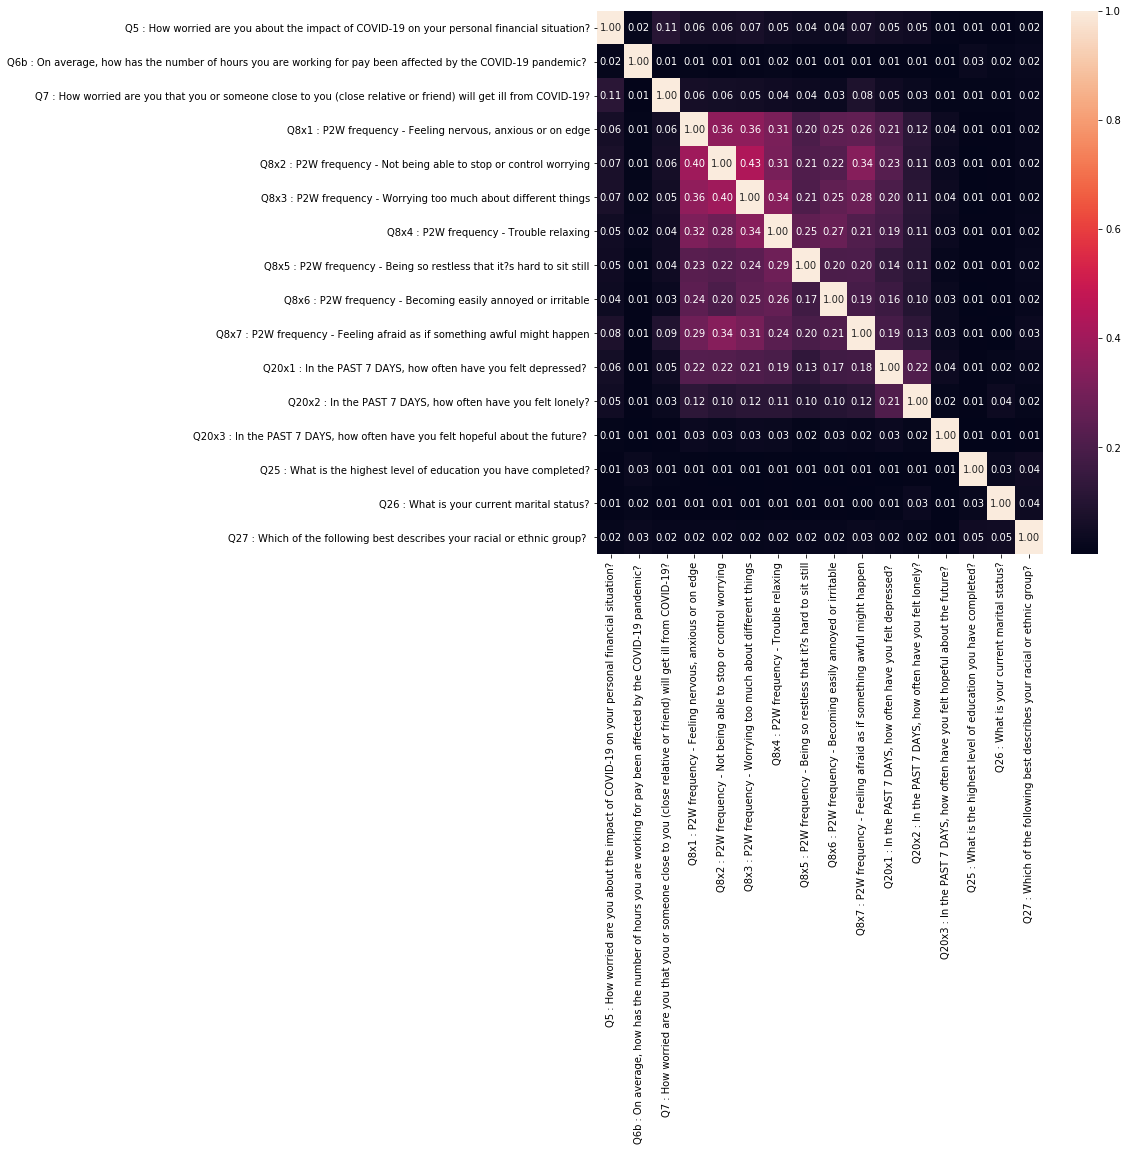

In [23]:
def cond_entropy(x,y):
    #entropy of x given y
    #used to calculate the uncertainty coefficient
    y_count= Counter(y)
    xy_count= Counter(list(zip(x,y)))
    total_occurrences= sum(y_count.values())
    entropy= 0
    for xy in xy_count.keys():
        p_xy= xy_count[xy] / total_occurrences
        p_y= y_count[xy[1]] / total_occurrences
        entropy += p_xy*math.log(p_y/p_xy)
    return entropy

def uncertain_coeff(x,y):
    #returns number between 0 and 1
    #0 means that feature y provides no info about feature x
    #1 means that feature y provides full info about feature x's value
    s_xy= cond_entropy(x,y)
    x_count= Counter(x)
    total_occurrences= sum(x_count.values())
    p_x= list(map(lambda n: n/total_occurrences, x_count.values()))
    s_x= ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x
    
q_cols= ['Q5 : How worried are you about the impact of COVID-19 on your personal financial situation?','Q6b : On average, how has the number of hours you are working for pay been affected by the COVID-19 pandemic? ','Q7 : How worried are you that you or someone close to you (close relative or friend) will get ill from COVID-19?','Q8x1 : P2W frequency - Feeling nervous, anxious or on edge','Q8x2 : P2W frequency - Not being able to stop or control worrying','Q8x3 : P2W frequency - Worrying too much about different things','Q8x4 : P2W frequency - Trouble relaxing','Q8x5 : P2W frequency - Being so restless that it?s hard to sit still','Q8x6 : P2W frequency - Becoming easily annoyed or irritable','Q8x7 : P2W frequency - Feeling afraid as if something awful might happen','Q20x1 : In the PAST 7 DAYS, how often have you felt depressed? ','Q20x2 : In the PAST 7 DAYS, how often have you felt lonely?','Q20x3 : In the PAST 7 DAYS, how often have you felt hopeful about the future? ','Q25 : What is the highest level of education you have completed?','Q26 : What is your current marital status?','Q27 : Which of the following best describes your racial or ethnic group? ']
corr= pd.DataFrame(index= q_cols, columns= q_cols)
for j in range(len(q_cols)):
    for k in range(len(q_cols)):
        u= uncertain_coeff(sur2[q_cols[j]].tolist(), sur2[q_cols[k]].tolist())
        corr.loc[q_cols[j],q_cols[k]]= u
corr.fillna(value= np.nan, inplace= True)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot= True, fmt= '.2f')

**For the majority of the questions, there is either no association or a weak association between the responses.** For example, the association between the responses to "Q6b : On average, how has the number of hours you are working for pay been affected by the COVID-19 pandemic?" and "Q8x1 : P2W frequency - Feeling nervous, anxious, or on edge" is 0.01. This means we cannot estimate how nervous/anxious/on edge someone is feeling based on how their number of working hours have changed. **This means that it would be difficult to know if a mental health initiative created specifically for individuals whose working hours have changed had an influence on their feelings of nervousness/anxiety and therefore may not be worth pursuing as a mental health initiative**.

The survey responses that had the highest associations were those asking about the frequency of feelings associated with anxiety. This means that, for example, feelings of not being able to control worrying were moderately associated with having trouble relaxing. Considering that each of these particular questions were related to feelings of anxiety, it isn't surprising that there is an association between their responses. We also see small to moderate associations for the responses to the multiple questions related to depression. Associations like these likely aren't very helpful in creating targeted mental health initiatives or modifying current initiatives so they better suit individuals with needs that have arose as a result of the pandemic since the feelings of anxiety and/or depression aren't associated with any life changes that arose due to the pandemic.

## Comparison of Survey Responses based on Province

As of June 24, the three provinces with the highest number of total cases were Quebec (>54,000 total cases), Ontario (>34,000), and Alberta (>7000). Note that these are raw counts and do not account for the proportion of people living in each of these provinces. Despite this, the responses to the survey questions and the mental health needs of people living in these provinces may differ compared to when the entire country is considered. To investigate this further, visualizations of the proportions of the possible responses for the following questions for Quebec, Ontario, Alberta, and Canada-wide were created:

- Q5 : How worried are you about the impact of COVID-19 on your personal financial situation?
- Q7 : How worried are you that you or someone close to you (close relative or friend) will get ill from COVID-19?
- Q8x1 : P2W frequency - Feeling nervous, anxious or on edge
- Q20x1 : In the PAST 7 DAYS, how often have you felt depressed?
- Q20x3 : In the PAST 7 DAYS, how often have you felt hopeful about the future?

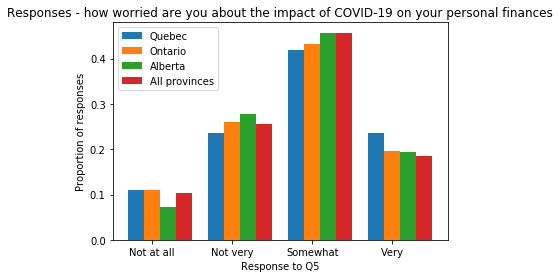

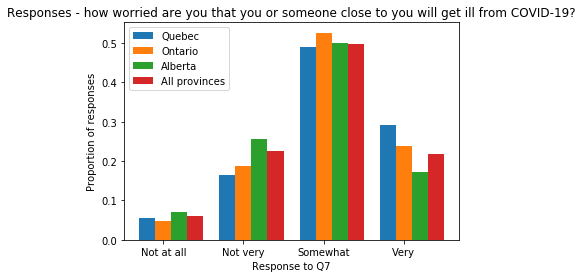

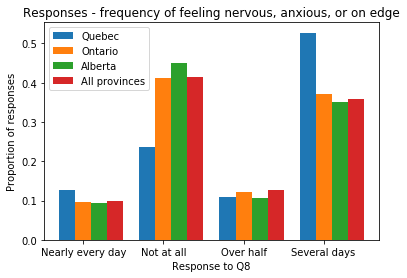

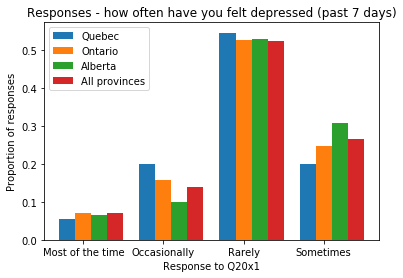

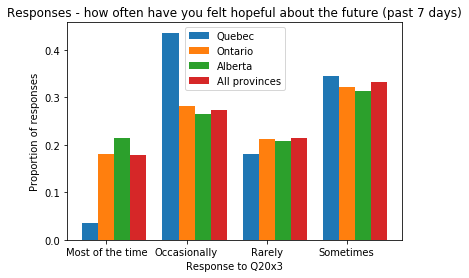

In [24]:
#dataframes with data only from Quebec, Ontario, Alberta
quebec= sur2.loc[(sur2['Province'] == 'Quebec')]
ontario= sur2.loc[(sur2['Province'] == 'Ontario')]
alberta= sur2.loc[(sur2['Province'] == 'Alberta')]

#function to return proportion of responses to a survey question
#(each survey had multiple possible responses. this function returns the proportion of people that responded to each possible response)
def prop_responses(df, col):
    return df[col].value_counts()/np.shape(df)[0]

#function to plot proportion of responses
#first 4 arguments are dataframes of all survey responses for the 3 provinces of interest + Canada
#q is column name (string) of the survey question to create plot for
#q_num is string of the question number
def plot_props(que, ont, alb, can, q, q_num):
    quebec= prop_responses(que, q).sort_index()
    ontario= prop_responses(ont, q).sort_index()
    alberta= prop_responses(alb, q).sort_index()
    all_prov= prop_responses(can, q).sort_index()
    
    bar_width= 0.2
    r1= np.arange(len(quebec))
    r2= [x + bar_width for x in r1]
    r3= [x + bar_width for x in r2]
    r4= [x + bar_width for x in r3]
    
    plt.figure()
    plt.bar(r1, quebec, width= bar_width, label= 'Quebec')
    plt.bar(r2,ontario,width=bar_width, label= 'Ontario')
    plt.bar(r3, alberta, width= bar_width, label= "Alberta")
    plt.bar(r4, all_prov, width= bar_width, label= 'All provinces')
    plt.xlabel('Response to Q'+ q_num); plt.ylabel('Proportion of responses')
    plt.legend()
    
    #correctly label the possible responses on the x-axis and give relevant title to plot
    if q_num in ['5','7']:
        plt.xticks([r+ bar_width for r in range(len(quebec))], ['Not at all','Not very','Somewhat','Very'])
        if q_num == '5':
            plt.title('Responses - how worried are you about the impact of COVID-19 on your personal finances')
        else:
            plt.title('Responses - how worried are you that you or someone close to you will get ill from COVID-19?')
    if q_num == '8':
        plt.xticks([r+ bar_width for r in range(len(quebec))], ['Nearly every day','Not at all','Over half','Several days'])
        plt.title('Responses - frequency of feeling nervous, anxious, or on edge')
    if q_num in ['20x1', '20x3']:
        plt.xticks([r+ bar_width for r in range(len(quebec))], ['Most of the time','Occasionally','Rarely','Sometimes'])
        if q_num == '20x1':
            plt.title('Responses - how often have you felt depressed (past 7 days)')
        if q_num == '20x3':
            plt.title('Responses - how often have you felt hopeful about the future (past 7 days)')
    return

plot_props(quebec, ontario, alberta, sur2, 'Q5 : How worried are you about the impact of COVID-19 on your personal financial situation?', '5')
plot_props(quebec, ontario, alberta, sur2, 'Q7 : How worried are you that you or someone close to you (close relative or friend) will get ill from COVID-19?', '7')
plot_props(quebec, ontario, alberta, sur2, 'Q8x1 : P2W frequency - Feeling nervous, anxious or on edge', '8')
plot_props(quebec, ontario, alberta, sur2, 'Q20x1 : In the PAST 7 DAYS, how often have you felt depressed? ','20x1')
plot_props(quebec, ontario, alberta, sur2, 'Q20x3 : In the PAST 7 DAYS, how often have you felt hopeful about the future? ', '20x3')

To better understand these plots, consider the last plot (*Responses - how often have you felt hopeful about the future (past 7 days)*). About 3% of participants from Quebec responded "Most of the time", between 40-45% responded "Occasionally", a little less than 20% responded "Rarely", and over 30% responded "Sometimes".

Although it is best to have a proactive/preventative approach to any health treatment, considering that for each of these questions there was more than one response for the most negative possible answers, treating individuals who had these responses should be prioritized. For example, considering the last question, those who responded "rarely" and "sometimes" should be addressed before those who responded "occasionally" or "most of the time". To take it one step further, within those responses to the most negative possible answer, the province that had the greatest proportion of these responses should be prioritized. To determine if there was a statistically significant difference between the proportions of the most negative responses across the the three provinces and the country as a whole, 95% confidence intervals for a difference in proportions were computed as seen below. From these confidence intervals, a decision at a confidence level of 95% could be made as to whether the proportions of participants that responded most negatively to the survey questions under consideration were the same. These decisions are also provided below.

In [25]:
#function to calculate confidence interval for a difference in proportions between two groups
#if the proportions of the two groups are different, prints a statement saying this and specifying how the two groups are different
#if 0 is in the interval, there is strong evidence to suggest that the two proportions are the same, meaning both groups being considered should be prioritized equally
#arguments: group1/group2 are strings specifying the name of the groups under consideration. resp1/resp2 are the numbers of people that gave the worst response in the two groups. size1/size2 are the total size of the two groups
#arguments cont: q is the survey question under consideration (string), alpha is level of significance
def two_prop_CI(group1, resp1, size1, group2, resp2, size2, q, alpha= 0.05):
    prop1= resp1/size1
    prop2= resp2/size2
    var= prop1 * (1-prop1) / size1 + prop2 * (1-prop2) / size2
    stdev= var**0.5
    
    z= ss.norm(loc= 0, scale= 1).ppf((1-alpha)+ (alpha/2))
    
    diff= prop2 - prop1
    CI= diff + np.array([-1, 1])*z*stdev
    
    if CI[0] < 0:
        if CI[1] > 0:
            #print('No difference in proportion of responses to ' + q + '. Applies to ' + group1 + ' and ' + group2+ '. Equally prioritize mental health initiatives in these areas')
            return
        elif CI[1] <0:
            print('Greater proportion of negative responses from '+ group2+' compared to '+ group1+' for '+q)
            return
    elif CI[0] > 0:
        print('Greater proportion of negative responses from '+ group1+' compared to '+ group2+' for '+q)
        return
    return

#number of participants from the three provinces and total number of participants
que_size= len(quebec)
ont_size= len(ontario)
alb_size= len(alberta)
can_size= len(sur2)

#5 survey questions being considered
q5= 'Q5 : How worried are you about the impact of COVID-19 on your personal financial situation?'
q7= 'Q7 : How worried are you that you or someone close to you (close relative or friend) will get ill from COVID-19?'
q8= 'Q8x1 : P2W frequency - Feeling nervous, anxious or on edge'
q20x1= 'Q20x1 : In the PAST 7 DAYS, how often have you felt depressed? '
q20x3= 'Q20x3 : In the PAST 7 DAYS, how often have you felt hopeful about the future? '

for i in [q5, q7, q8, q20x1, q20x3]:
    if i in [q5, q7]:
        idx= -1 #idx is the index of the "worst" response in value_counts()
    elif i in [q8, q20x1]:
        idx= 0
    else: #only 20x3 remains
        idx= 2
    
    #number of responses to the most negative response to the survey question
    que_resp= quebec[i].value_counts().sort_index()[idx]
    ont_resp= ontario[i].value_counts().sort_index()[idx]
    alb_resp= alberta[i].value_counts().sort_index()[idx]
    can_resp= sur2[i].value_counts().sort_index()[idx]
    
    two_prop_CI('Quebec',que_resp,que_size,'Ontario',ont_resp,ont_size,i)
    two_prop_CI('Quebec', que_resp, que_size, 'Alberta', alb_resp, alb_size, i)
    two_prop_CI('Quebec', que_resp, que_size, 'across Canada', can_resp, can_size, i)
    two_prop_CI('Alberta',alb_resp,alb_size,'Ontario',ont_resp,ont_size,i)
    two_prop_CI('Alberta',alb_resp,alb_size,'across Canada',can_resp,can_size,i)
    two_prop_CI('Ontario',ont_resp,ont_size,'across Canada',can_resp,can_size,i)

No print statement from the two_prop_CI function suggests that the proportion of responses to the most negative response for these five survey questions were the same across the three provinces and Canada-wide. **This suggests that the offering of mental health initiatives and services can be equally prioritized across the country; the proportion of most negative repsonses from the provinces that have the most confirmed cases do not differ from the proportion of most negative repsonses country-wide.**

## Comparison of Survey Responses based on whether the Participant was Living with Children

The responses to the survey questions and the mental health needs of people living with children may differ to those living without children. To investigate this further, the same confidence interval exercise described above (for the responses from the participants living in different provinces) was completed for these two groups (living with kids, living without kids). The same five survey questions as those considered in the investigation of the provinces are considered here. Unlike the immediately previous section, plots have been omitted.

In [26]:
kids= sur2.loc[(sur2['hChildren : Do you have children living in your household?'] == 'Kids')]
nokids= sur2.loc[(sur2['hChildren : Do you have children living in your household?'] == 'No Kids')]

k_size= len(kids)
nk_size= len(nokids)

for i in [q5, q7, q8, q20x1, q20x3]:
    if i in [q5, q7]:
        idx= -1 #idx is the index of the "worst" response in value_counts()
    elif i in [q8, q20x1]:
        idx= 0
    else: #only 20x3 remains
        idx= 2
    
    #number of responses to the most negative response to the survey question
    k_resp= kids[i].value_counts().sort_index()[idx]
    nk_resp= nokids[i].value_counts().sort_index()[idx]
    
    two_prop_CI('Kids', k_resp, k_size, 'No kids', nk_resp, nk_size, i)

Greater proportion of negative responses from No kids compared to Kids for Q7 : How worried are you that you or someone close to you (close relative or friend) will get ill from COVID-19?
Greater proportion of negative responses from No kids compared to Kids for Q8x1 : P2W frequency - Feeling nervous, anxious or on edge


These confidence intervals indicate that there is a significantly greater proportion of negative survey responses from those living without children for two of the five survey questions considered. **This suggests that people living without children may benefit from targeted mental health services.**

# Conclusions
This notebook used survey data from CAMH and Delvinia to identify associations between Canadians' moods/feelings of depression and anxiety and changes to their everyday lives as a result of the pandemic. The associations were weak, suggesting that it would be difficult to tell if mental health initiatives specifically targeted to individuals experiencing specific life changes (for example, a reduced number of paid working hours) have any impact on their mental health. This notebook also used the survey data to determine if the feelings/needs regarding mental health varied across provinces, with consideration given to the three provinces with the most confirmed COVID-19 cases. No significant differences were found between provinces with regards to the number of most negative responses to five of the survey questions, suggesting that the offering of mental health services can be equally prioritized country-wide, regardless that some provinces have many more confirmed cases than others. There was a significant difference between participants living with children and participants living without children with regards to the proportion of most negative responses for two of the survey questions, suggesting that adults living without children may benefit from targeted mental health initiatives.

# Limitations and Other Considerations
A limitation of this notebook is that the survey didn't include questions about whether the participant was using/seeking mental health resources prior to the pandemic so it is difficult to evaluate how mental health challenges have shifted since the start of the pandemic; the only data we can compare to is the first round of the survey responses (not included in this notebook). Also, at the time of these surveys, aids such as CERB had already been made available to Canadians. The responses to the survey questions may have been different if the survey were released prior to when these aids were made available. It would be interesting to compare the responses between these times (pre-CERB and post-CERB, for example) and see how mental health challenges had shifted in this short time period. The survey was also not exhaustive in that no questions that could shed some light on why people were feeling depressed/anxious at the time of survey completion were included (for example, abuse in the home, not being able to physically meet with people outside of the household, etc.). However, it is acknowledged that events related to the pandemic happened very quickly and that people are more likely to complete a survey with as few questions as possible compared to a more extensive survey; given the circumstances, the results give us an idea of shifts in mental health in Canada throughout the pandemic.

A final limitation is that the analysis presented in this notebook is by no means exhaustive. While I tried my best to present new information and not just repeat the summary report created by CAMH/Delvinia, there is opportunity for more analyses. Now that this dataset is in the Kaggle community, I hope more insight and investigation regarding shifts in mental health throughout the pandemic comes of this.

# Acknowledgments
Thanks to CAMH/Delvinia for collecting the survey data and making it available to the public. Thanks to [shakedzy](https://github.com/shakedzy) for providing the functions cond_entropy and uncertain_coeff.